| Machine Learning Assignment |   |
| ------ | ------ |
| Program | Master in Data Science At Bologna Business School |
| Course | Machine Learning for Classification |
| Submitted to | Ricardo Ñanculef |
| Submitted by | Atilla Guzel, Tejas Dhaketa |

# Introduction

### The Scope of the Project
- This project is the assignment of "Machine Learning for Classification" module at BBS Data Science Program.
- The general goal of this assignment is to show a practical application of the methods shown during the module. To accomplish this goal, performance of a multi-class SVM with that of a multi-class neural network is compared. 

### Selected Problem
- To unveil the performance of SVMs and ANNs, an image classification problem is framed.
- Kaggle website contains numerous datasets and challenges that are appropriate for any image classification problem.
- From the said website "Dogs and Cats" challenge was examined and chosen.

### Framework
- CRISP-DM framework is used throughout this project's comparison process.

### Tools

- For this assignment, in addition to Phyton 3.6 and its libraries sklearn, numpy, matplotlib, skimage, imagenet_utils, pickle a library specialized in deep learning called Keras+Tensorflow are used.
- Compatibility issues were dealt with code alterations and consistency checks.

# Section 1 - Business Understanding

- The goal of "Dogs vs Cats" challenge at Kaggle platform is to create an alghoritm to distinguish dogs from cats. Also in this assignment, same goal is shared to evaluate the performance of a multi-class SVM with that of a multi-class neural network.

# Section 2 - Data Understanding

- To do a comparison between methods, the image archive of "Dogs vs Cats" challenge on Kaggle network has been downloaded. (https://www.kaggle.com/c/dogs-vs-cats/data)
-  This challenge's website contains an archive of 25,000 images of dogs and cats to train the model.
- Due to computational constraints, initially a total of 1,000 images of dogs and cats was selected and saved into "dogs" and "cats" folders. In a further step down, the total number of images was cut-down to 200 to avoid unnecessary processing time. 

# Section 3 - Data Preparation

At this section, a quality check on the image set will be made to make sure it works for the purposes of this particular assignment. Various options can be considered at this part to see if the image set can yield better results once manipulated of converted into different forms.

The root directory which is specified below will be our main directory throughout the section. To be able to try the same images with different image types, seperate folders is created.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

Random images from cats folder can be seen below.

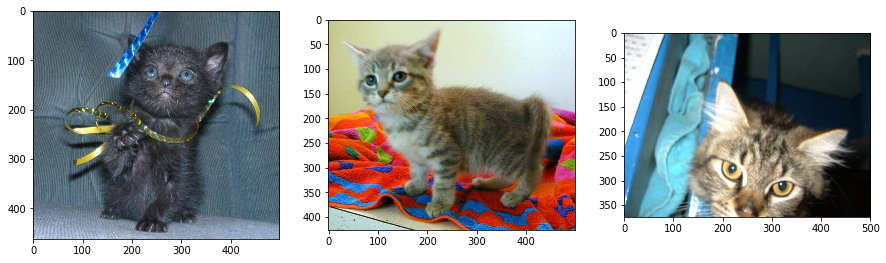

In [2]:
fig, ax = plt.subplots(1,3, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_cats)
img = plt.imread(os.path.join(root_dir, cats_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_cats)
img = plt.imread(os.path.join(root_dir, cats_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_cats)
img = plt.imread(os.path.join(root_dir, cats_dir, rand_img))
ax[2].imshow(img)

plt.show()

Random images from the dogs folder is shown below. Each iteration will generate random sets of images. As it can be clearly seen by looking at some of the images, there are different objects inside every picture along side with the class objects. These are factors that will possibly reduce the accuracy of a classifation model, but that does not change the fact that under the same conditions we will be able test our models's performance compared to each other. In fact, machine learning models simply can respond to various datasets differently. Therefore, it could be to good to run these models as well in challenging situations.

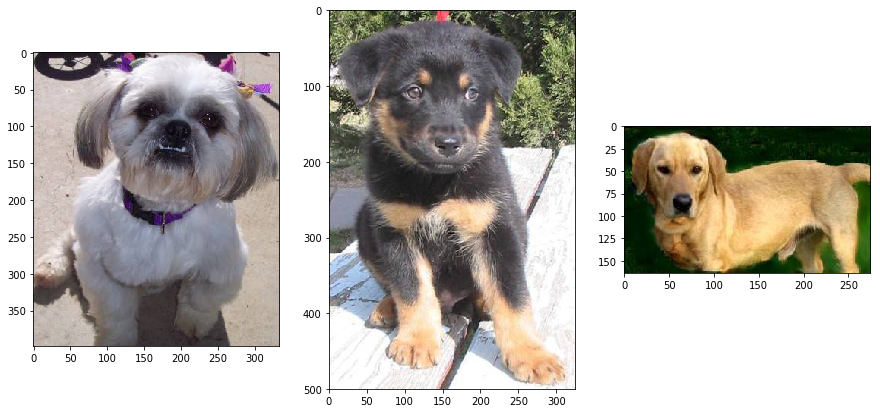

In [3]:
fig, ax = plt.subplots(1,3, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_dogs)
img = plt.imread(os.path.join(root_dir, dogs_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_dogs)
img = plt.imread(os.path.join(root_dir, dogs_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_dogs)
img = plt.imread(os.path.join(root_dir, dogs_dir, rand_img))
ax[2].imshow(img)

plt.show()

Prior to training our model, images from each of the two classes have been resized to match a certain size at the stage below by utilizing skimage.transform.resize module.

In [4]:
import matplotlib.image as img
from skimage.transform import resize

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

# Section 4 - Modeling

At this section we will build classifiers, train our dataset with various models to see their performance on recognition.

### SVM with 200 images

Below, the classes will be split into train and test set and the class vectors will be converted to binary class matrix. Out of 200 images, 160 will be used to train the model and 40 will be used to test it.

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

Using TensorFlow backend.


In the next lines, SVM will be used with kernel having parameter 'linear' and C=1 to train our model and the accuracy of train set and test set (as we are not using a real test set in this project for the purposes of simplicity, validation set will be refered to as test set during the assignment) will be printed. Kernels synthetize new features that are necessary to solve the classification problem more accurately. So, we will use different kernel parameters in the next stages to see their respective performance within a specific model.

In [6]:
from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='linear', C=C_default)
clf.fit(X_train, Y_train)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)

1.0
0.675


Below, we will iterate various C values with SVM-linear model to compare the contribution of C values to our model.

Acc Train: 1.000000, Acc Test:0.625000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000
Acc Train: 1.000000, Acc Test:0.675000


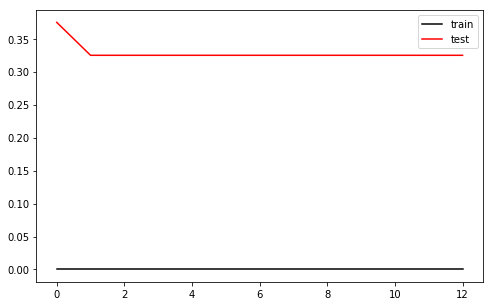

In [7]:
from sklearn import svm

C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='linear', C=C_val)
    clf.fit(X_train, Y_train)
    score_train = clf.score(X_train, Y_train)
    score_test = clf.score(X_test,Y_test)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

In the next lines, SVM will be used with kernel having parameter 'rbf' and C=1 to train our model and the accuracy of train set and test set will be printed.

In [8]:
from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='rbf', C=C_default)
clf.fit(X_train, Y_train)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)

0.975
0.575


In the next lines, SVM will be used with kernel having parameter 'rbf' and with various C values to train our model and the accuracy of train set and test set will be printed.

Acc Train: 0.506250, Acc Test:0.475000
Acc Train: 0.506250, Acc Test:0.475000
Acc Train: 0.506250, Acc Test:0.475000
Acc Train: 0.506250, Acc Test:0.475000
Acc Train: 0.506250, Acc Test:0.475000
Acc Train: 0.506250, Acc Test:0.475000
Acc Train: 0.856250, Acc Test:0.525000
Acc Train: 0.975000, Acc Test:0.575000
Acc Train: 1.000000, Acc Test:0.575000
Acc Train: 1.000000, Acc Test:0.575000
Acc Train: 1.000000, Acc Test:0.575000
Acc Train: 1.000000, Acc Test:0.575000
Acc Train: 1.000000, Acc Test:0.575000


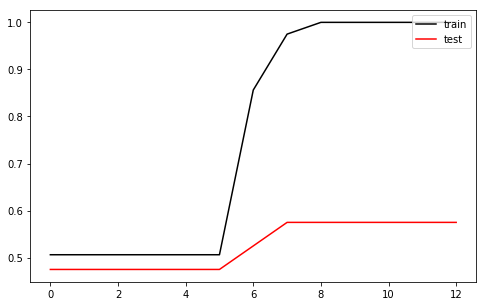

In [9]:
from sklearn import svm

C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_acc = []
train_acc = []

for C_val in C_values:
    clf = svm.SVC(kernel='rbf', C=C_val)
    clf.fit(X_train, Y_train)
    score_train = clf.score(X_train, Y_train)
    score_test = clf.score(X_test,Y_test)
    train_acc.append(score_train)
    prediction_acc.append(score_test)
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_acc,color='k',label='train')
plt.plot(range(len(C_values)),prediction_acc,color='r',label='test')
plt.legend(loc=1)
plt.show()

Let's see how all parameters work together at one place. At this stage we will drop the random_state paramater to see the performance of various kernel parameters combined with a number C values in different conditions. The codes below will generate different results each time they iterated due to lack of random_stat, yet it is quite possible to detect particular behaviours of respective models.

Model:0, Train Accuracy:1.000000, Test Accuracy:0.725000, C Value:0.000750
Model:0, Train Accuracy:1.000000, Test Accuracy:0.550000, C Value:0.001000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.600000, C Value:0.005000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.500000, C Value:0.010000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.550000, C Value:0.050000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.525000, C Value:0.100000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.650000, C Value:0.500000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.575000, C Value:1.000000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.575000, C Value:5.000000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.550000, C Value:10.000000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.500000, C Value:50.000000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.550000, C Value:100.000000
Model:0, Train Accuracy:1.000000, Test Accuracy:0.675000, C Value:500.000000
-------
Model:1, Tr

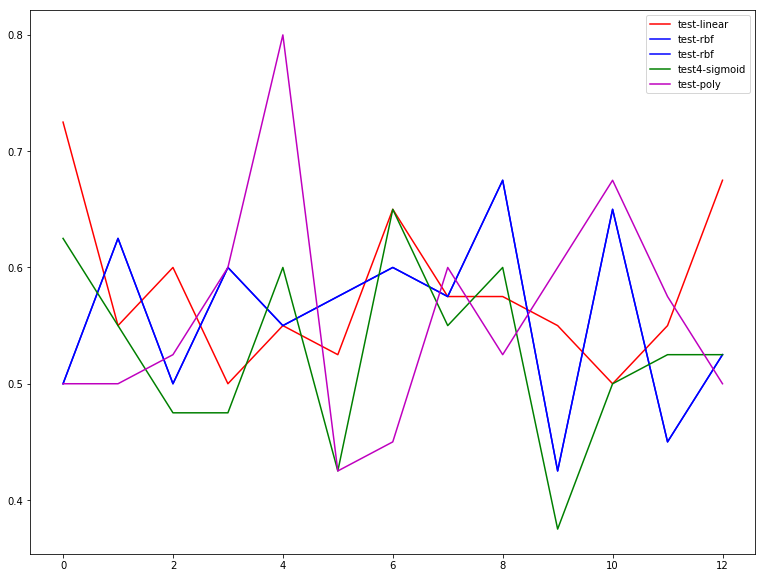

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))


import matplotlib.image as img
from skimage.transform import resize

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)


from sklearn import svm

C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
C_val = 1
prediction_acc = []
train_acc = []
models = (svm.SVC(kernel='linear', C=C_val),
          svm.SVC(kernel='rbf', C=C_val),
          svm.SVC(kernel='rbf', gamma=10, C=C_val),
          svm.SVC(kernel='sigmoid', C=1, gamma=0.1, coef0=0.25),
          svm.SVC(kernel='poly', degree=3, gamma=0.5, coef0=0.25, C=C_val))
    
plt.figure(1, figsize=(13, 10))
plt.clf()

for idx,model in enumerate(models):
    for C_val in C_values:
        X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)
        model.fit(X_train,Y_train)
        tr_acc = model.score(X_train,Y_train)
        ts_acc = model.score(X_test,Y_test)
        train_acc.append(tr_acc)
        prediction_acc.append(ts_acc)
        print("Model:%d, Train Accuracy:%f, Test Accuracy:%f, C Value:%f"%(idx,tr_acc,ts_acc,C_val))
    print('-------')
    aa = model.get_params()
    if 'linear' in aa.values():
#       plt.plot(range(len(C_values)),train_acc[:13],color='k',label='train-linear')
        plt.plot(range(len(C_values)),prediction_acc[:13],color='r',label='test-linear')
        
    elif 'rbf' in aa.values():
#       plt.plot(range(len(C_values)),train_acc[13:26],color='k',label='train-rbf')
        plt.plot(range(len(C_values)),prediction_acc[13:26],color='b',label='test-rbf')
        
    elif '10' in aa.values():
#       plt.plot(range(len(C_values)),train_acc[26:39],color='k',label='train-rbfgamma')
        plt.plot(range(len(C_values)),prediction_acc[26:39],color='c',label='test-rbfgamma')
    elif 'sigmoid' in aa.values():
#       plt.plot(range(len(C_values)),train_acc[39:52],color='k',label='train-sigmoid')
        plt.plot(range(len(C_values)),prediction_acc[39:52],color='g',label='test4-sigmoid')
    else:
#       plt.plot(range(len(C_values)),train_acc[52:],color='k',label='train-poly')
        plt.plot(range(len(C_values)),prediction_acc[52:],color='m',label='test-poly')

plt.legend(loc=1)
plt.show()

Above, test accuracy values can be read in the figure. For the purposes of readability training accuracy will be plotted into a seperate chart below. 

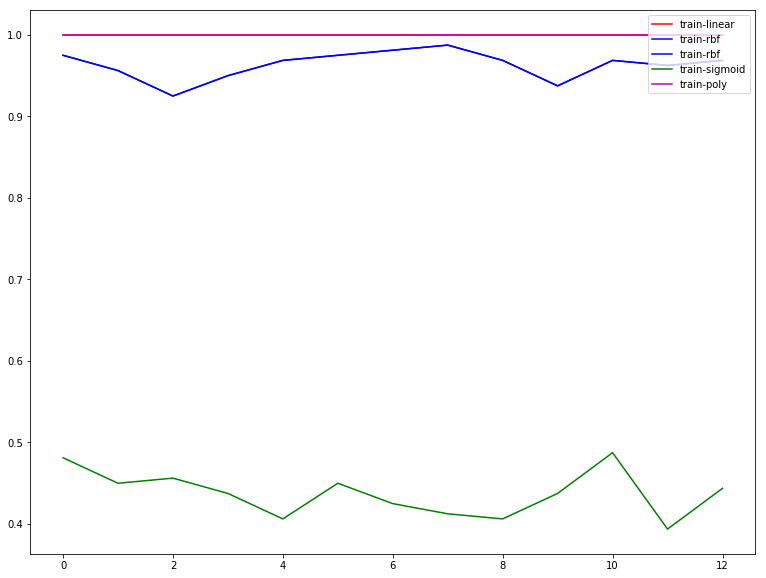

In [11]:
C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]

models = (svm.SVC(kernel='linear', C=C_val),
          svm.SVC(kernel='rbf', C=C_val),
          svm.SVC(kernel='rbf', gamma=10, C=C_val),
          svm.SVC(kernel='sigmoid', C=1, gamma=0.1, coef0=0.25),
          svm.SVC(kernel='poly', degree=3, gamma=0.5, coef0=0.25, C=C_val))

plt.figure(1, figsize=(13, 10))
plt.clf()

for idx,model in enumerate(models):
    aa = model.get_params()
    if 'linear' in aa.values():
        plt.plot(range(len(C_values)),train_acc[:13],color='r',label='train-linear') 
        
    elif 'rbf' in aa.values():
        plt.plot(range(len(C_values)),train_acc[13:26],color='b',label='train-rbf') 
        
    elif '10' in aa.values():
        plt.plot(range(len(C_values)),train_acc[26:39],color='c',label='train-rbfgamma')
        
    elif 'sigmoid' in aa.values():
        plt.plot(range(len(C_values)),train_acc[39:52],color='g',label='train-sigmoid')

    else:
        plt.plot(range(len(C_values)),train_acc[52:],color='m',label='train-poly')

plt.legend(loc=1)
plt.show()

### Neural Network Using Keras Library 

At this stage, we will create a neural network using the Keras library. Specify a shape for the input layer, a shape for the output layer and stack layers in between! 

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

import matplotlib.image as img
from skimage.transform import resize

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam, SGD, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle

model = Sequential()
model.add(Dense(100,input_shape=(12675,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 64
n_epochs = 20

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))

with open('FNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Train on 160 samples, validate on 40 samples
Epoch 1/20
 - 0s - loss: 1.9289 - acc: 0.4688 - val_loss: 0.9917 - val_acc: 0.6500
Epoch 2/20
 - 0s - loss: 2.7201 - acc: 0.5563 - val_loss: 0.8495 - val_acc: 0.6750
Epoch 3/20
 - 0s - loss: 3.0565 - acc: 0.5875 - val_loss: 1.8171 - val_acc: 0.6000
Epoch 4/20
 - 0s - loss: 3.6954 - acc: 0.5438 - val_loss: 2.2172 - val_acc: 0.5750
Epoch 5/20
 - 0s - loss: 3.8447 - acc: 0.5812 - val_loss: 2.6341 - val_acc: 0.5250
Epoch 6/20
 - 0s - loss: 4.0228 - acc: 0.5812 - val_loss: 2.7785 - val_acc: 0.5250
Epoch 7/20
 - 0s - loss: 3.7710 - acc: 0.5500 - val_loss: 2.6666 - val_acc: 0.5250
Epoch 8/20
 - 0s - loss: 4.1835 - acc: 0.5312 - val_loss: 2.4225 - val_acc: 0.5500
Epoch 9/20
 - 0s - loss: 3.2492 - acc: 0.6063 - val_loss: 2.2602 - val_acc: 0.5250
Epoch 10/20
 - 0s - loss: 3.6897 - acc: 0.5938 - val_loss: 2.1067 - val_acc: 0.5500
Epoch 11/20
 - 0s - loss: 3.7211 - acc: 0.5875 - val_loss: 1.8120 - val_acc: 0.5750
Epoch 12/20
 - 0s - loss: 3.7670 - acc: 

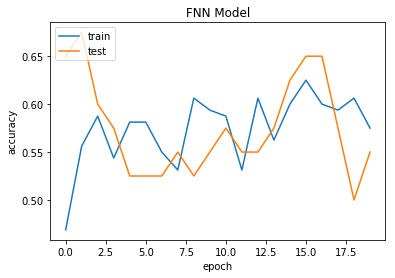

In [13]:
with open('FNN_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('FNN Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
optimizer = Adagrad()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 64
n_epochs = 20

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))

with open('FNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Train on 160 samples, validate on 40 samples
Epoch 1/20
 - 0s - loss: 4.6173 - acc: 0.5750 - val_loss: 3.6775 - val_acc: 0.5500
Epoch 2/20
 - 0s - loss: 5.3609 - acc: 0.5875 - val_loss: 4.7707 - val_acc: 0.5250
Epoch 3/20
 - 0s - loss: 5.9881 - acc: 0.5250 - val_loss: 3.7727 - val_acc: 0.6500
Epoch 4/20
 - 0s - loss: 5.1894 - acc: 0.5938 - val_loss: 3.4456 - val_acc: 0.6250
Epoch 5/20
 - 0s - loss: 5.4406 - acc: 0.5938 - val_loss: 3.5093 - val_acc: 0.6500
Epoch 6/20
 - 0s - loss: 4.7367 - acc: 0.6437 - val_loss: 4.0130 - val_acc: 0.6000
Epoch 7/20
 - 0s - loss: 5.8081 - acc: 0.5563 - val_loss: 4.2736 - val_acc: 0.5750
Epoch 8/20
 - 0s - loss: 6.0137 - acc: 0.5375 - val_loss: 4.1926 - val_acc: 0.5750
Epoch 9/20
 - 0s - loss: 4.8627 - acc: 0.6188 - val_loss: 4.3022 - val_acc: 0.6000
Epoch 10/20
 - 0s - loss: 4.8606 - acc: 0.6562 - val_loss: 4.4111 - val_acc: 0.6250
Epoch 11/20
 - 0s - loss: 4.4394 - acc: 0.6500 - val_loss: 4.4579 - val_acc: 0.5750
Epoch 12/20
 - 0s - loss: 5.2937 - acc: 

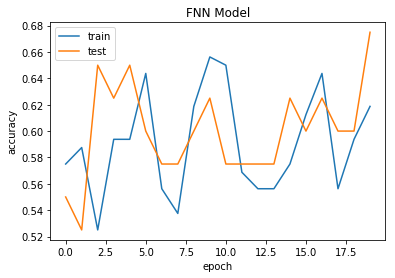

In [15]:
with open('FNN_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('FNN Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
optimizer = SGD()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 64
n_epochs = 20

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))

with open('FNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Train on 160 samples, validate on 40 samples
Epoch 1/20
 - 0s - loss: 4.8328 - acc: 0.5875 - val_loss: 3.4539 - val_acc: 0.6000
Epoch 2/20
 - 0s - loss: 5.1340 - acc: 0.6000 - val_loss: 3.4917 - val_acc: 0.6000
Epoch 3/20
 - 0s - loss: 4.9211 - acc: 0.6063 - val_loss: 2.9901 - val_acc: 0.5750
Epoch 4/20
 - 0s - loss: 4.3769 - acc: 0.6000 - val_loss: 2.9835 - val_acc: 0.6250
Epoch 5/20
 - 0s - loss: 4.8471 - acc: 0.5563 - val_loss: 3.0256 - val_acc: 0.6250
Epoch 6/20
 - 0s - loss: 4.4451 - acc: 0.6312 - val_loss: 2.8554 - val_acc: 0.6000
Epoch 7/20
 - 0s - loss: 3.6341 - acc: 0.6437 - val_loss: 2.4665 - val_acc: 0.6000
Epoch 8/20
 - 0s - loss: 4.0100 - acc: 0.6312 - val_loss: 1.8656 - val_acc: 0.5750
Epoch 9/20
 - 0s - loss: 4.2448 - acc: 0.5875 - val_loss: 1.7174 - val_acc: 0.6000
Epoch 10/20
 - 0s - loss: 3.8787 - acc: 0.6063 - val_loss: 1.3784 - val_acc: 0.6000
Epoch 11/20
 - 0s - loss: 3.1528 - acc: 0.6312 - val_loss: 1.1959 - val_acc: 0.5750
Epoch 12/20
 - 0s - loss: 3.5896 - acc: 

At this stage, our neural networks will be trained.

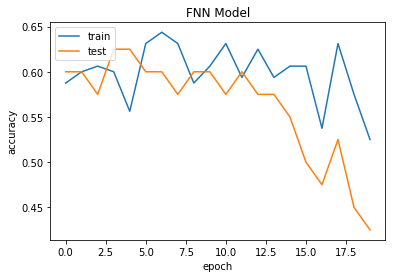

In [17]:
with open('FNN_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('FNN Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Creating and Training a Convolutional Neural Net

_convolutional neural nets_ (CNNs).

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt

root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

import matplotlib.image as img
from skimage.transform import resize

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam, SGD, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(target_w, target_h, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(10))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 10

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))

with open('CNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(200, 65, 65, 3)
(200,)
Train on 160 samples, validate on 40 samples
Epoch 1/10
 - 3s - loss: 0.7167 - acc: 0.4875 - val_loss: 0.6893 - val_acc: 0.5000
Epoch 2/10
 - 3s - loss: 0.7020 - acc: 0.5062 - val_loss: 0.6984 - val_acc: 0.5250
Epoch 3/10
 - 3s - loss: 0.6945 - acc: 0.4937 - val_loss: 0.6944 - val_acc: 0.5250
Epoch 4/10
 - 3s - loss: 0.6936 - acc: 0.4937 - val_loss: 0.6932 - val_acc: 0.4750
Epoch 5/10
 - 3s - loss: 0.6899 - acc: 0.5125 - val_loss: 0.7006 - val_acc: 0.4750
Epoch 6/10
 - 3s - loss: 0.6909 - acc: 0.5062 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 7/10
 - 3s - loss: 0.6795 - acc: 0.5250 - val_loss: 0.6949 - val_acc: 0.4750
Epoch 8/10
 - 3s - loss: 0.6676 - acc: 0.5250 - val_loss: 0.6813 - val_acc: 0.6500
Epoch 9/10
 - 3s - loss: 0.6466 - acc: 0.7000 - val_loss: 0.7368 - val_acc: 0.4750
Epoch 10/10
 - 3s - loss: 0.6438 - acc: 0.6312 - val_loss: 0.6823 - val_acc: 0.6000


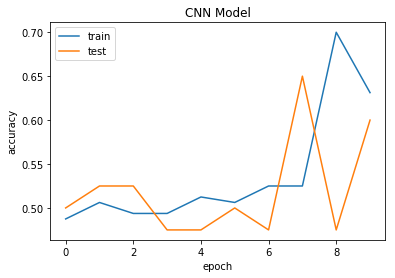

In [19]:
with open('CNN_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('CNN Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
optimizer = SGD()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 10

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))

with open('CNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Train on 160 samples, validate on 40 samples
Epoch 1/10
 - 3s - loss: 0.6236 - acc: 0.7625 - val_loss: 0.6684 - val_acc: 0.5250
Epoch 2/10
 - 3s - loss: 0.6088 - acc: 0.7812 - val_loss: 0.6669 - val_acc: 0.5500
Epoch 3/10
 - 3s - loss: 0.6074 - acc: 0.7812 - val_loss: 0.6723 - val_acc: 0.5500
Epoch 4/10
 - 3s - loss: 0.5989 - acc: 0.7500 - val_loss: 0.6663 - val_acc: 0.6250
Epoch 5/10
 - 3s - loss: 0.5953 - acc: 0.8125 - val_loss: 0.6651 - val_acc: 0.6000
Epoch 6/10
 - 3s - loss: 0.5944 - acc: 0.7750 - val_loss: 0.6641 - val_acc: 0.5750
Epoch 7/10
 - 2s - loss: 0.5936 - acc: 0.8000 - val_loss: 0.6747 - val_acc: 0.5250
Epoch 8/10
 - 3s - loss: 0.5901 - acc: 0.7313 - val_loss: 0.6619 - val_acc: 0.6000
Epoch 9/10
 - 3s - loss: 0.5822 - acc: 0.7938 - val_loss: 0.6607 - val_acc: 0.6000
Epoch 10/10
 - 3s - loss: 0.5822 - acc: 0.8063 - val_loss: 0.6600 - val_acc: 0.6000


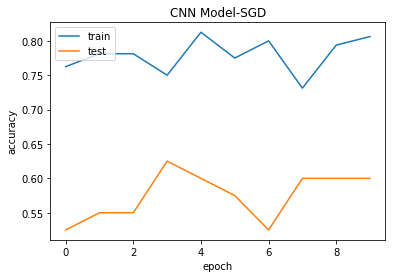

In [21]:
with open('CNN_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('CNN Model-SGD')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
optimizer = Adagrad()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 10

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))

with open('CNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Train on 160 samples, validate on 40 samples
Epoch 1/10
 - 3s - loss: 2.8386 - acc: 0.6312 - val_loss: 0.6983 - val_acc: 0.5250
Epoch 2/10
 - 3s - loss: 0.6914 - acc: 0.5500 - val_loss: 0.6888 - val_acc: 0.5250
Epoch 3/10
 - 3s - loss: 0.6880 - acc: 0.5563 - val_loss: 0.6843 - val_acc: 0.5750
Epoch 4/10
 - 3s - loss: 0.6799 - acc: 0.6312 - val_loss: 0.6843 - val_acc: 0.5250
Epoch 5/10
 - 3s - loss: 0.6730 - acc: 0.6125 - val_loss: 0.6835 - val_acc: 0.5250
Epoch 6/10
 - 3s - loss: 0.7098 - acc: 0.5687 - val_loss: 0.6818 - val_acc: 0.6000
Epoch 7/10
 - 3s - loss: 0.6654 - acc: 0.6625 - val_loss: 0.6831 - val_acc: 0.5250
Epoch 8/10
 - 3s - loss: 0.6634 - acc: 0.5938 - val_loss: 0.6776 - val_acc: 0.5750
Epoch 9/10
 - 3s - loss: 0.6585 - acc: 0.6312 - val_loss: 0.6800 - val_acc: 0.5250
Epoch 10/10
 - 3s - loss: 0.6432 - acc: 0.6562 - val_loss: 0.6914 - val_acc: 0.5250


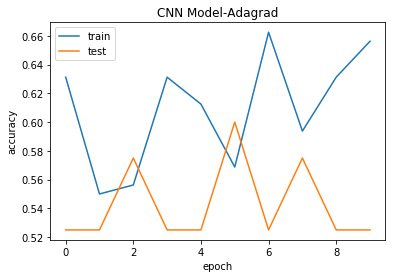

In [23]:
with open('CNN_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('CNN Model-Adagrad')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam, SGD, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle

X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(target_w, target_h, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(10))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 10

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))

with open('CNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(200, 65, 65, 3)
(200,)
Train on 160 samples, validate on 40 samples
Epoch 1/10
 - 4s - loss: 0.6986 - acc: 0.4813 - val_loss: 0.6914 - val_acc: 0.5750
Epoch 2/10
 - 3s - loss: 0.6921 - acc: 0.5375 - val_loss: 0.6926 - val_acc: 0.4750
Epoch 3/10
 - 3s - loss: 0.6996 - acc: 0.5187 - val_loss: 0.6875 - val_acc: 0.4750
Epoch 4/10
 - 3s - loss: 0.6887 - acc: 0.5812 - val_loss: 0.6894 - val_acc: 0.5250
Epoch 5/10
 - 3s - loss: 0.6818 - acc: 0.6125 - val_loss: 0.6886 - val_acc: 0.4750
Epoch 6/10
 - 3s - loss: 0.6991 - acc: 0.4562 - val_loss: 0.6804 - val_acc: 0.6250
Epoch 7/10
 - 3s - loss: 0.6845 - acc: 0.5375 - val_loss: 0.6849 - val_acc: 0.4750
Epoch 8/10
 - 3s - loss: 0.6678 - acc: 0.5938 - val_loss: 0.6752 - val_acc: 0.6250
Epoch 9/10
 - 3s - loss: 0.6522 - acc: 0.7062 - val_loss: 0.7100 - val_acc: 0.4750
Epoch 10/10
 - 3s - loss: 0.6470 - acc: 0.6312 - val_loss: 0.7039 - val_acc: 0.5250


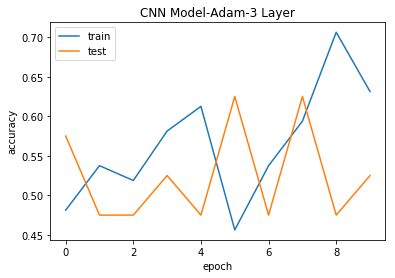

In [25]:
with open('CNN_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('CNN Model-Adam-3 Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Using Pre-trained Nets

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt

root_dir = 'cats_dogs/'
cats_dir = 'cats/'
dogs_dir = 'dogs/'

all_cats = os.listdir(os.path.join(root_dir, cats_dir))
all_dogs = os.listdir(os.path.join(root_dir, dogs_dir))

import matplotlib.image as img
from skimage.transform import resize

target_w = 299
target_h = 299
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_cats:
    img_arr = img.imread(os.path.join(root_dir, cats_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_dogs:
    img_arr = img.imread(os.path.join(root_dir, dogs_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h), mode='reflect')
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = np.array(all_imgs, dtype=np.float32)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#from vgg16 import VGG16
#from keras.preprocessing import image
#from imagenet_utils import preprocess_input

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import pickle

model = VGG16(weights='imagenet', include_top=False)

X = preprocess_input(X)
print(X.shape)

features = model.predict(X)

print(features.shape)
print(type(features))

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(9,9,512)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 10



features_train, features_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2, random_state=42)

history = model.fit(features_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2, validation_data=(features_test, Y_test))


with open('VGG16_based_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(200, 299, 299, 3)
(200,)
(200, 299, 299, 3)
(200, 9, 9, 512)
<class 'numpy.ndarray'>
Train on 160 samples, validate on 40 samples
Epoch 1/10
 - 1s - loss: 0.7273 - acc: 0.5062 - val_loss: 0.6913 - val_acc: 0.5250
Epoch 2/10
 - 0s - loss: 0.6932 - acc: 0.5563 - val_loss: 0.7121 - val_acc: 0.4750
Epoch 3/10
 - 0s - loss: 0.7130 - acc: 0.5000 - val_loss: 0.6997 - val_acc: 0.5250
Epoch 4/10
 - 1s - loss: 0.7022 - acc: 0.5000 - val_loss: 0.6921 - val_acc: 0.5250
Epoch 5/10
 - 1s - loss: 0.6935 - acc: 0.4813 - val_loss: 0.6933 - val_acc: 0.4750
Epoch 6/10
 - 0s - loss: 0.6931 - acc: 0.5062 - val_loss: 0.6933 - val_acc: 0.4750
Epoch 7/10
 - 0s - loss: 0.6931 - acc: 0.5062 - val_loss: 0.6933 - val_acc: 0.4750
Epoch 8/10
 - 0s - loss: 0.6931 - acc: 0.5062 - val_loss: 0.6933 - val_acc: 0.4750
Epoch 9/10
 - 0s - loss: 0.6931 - acc: 0.5062 - val_loss: 0.6933 - val_acc: 0.4750
Epoch 10/10
 - 0s - loss: 0.6931 - acc: 0.5062 - val_loss: 0.6933 - val_acc: 0.4750


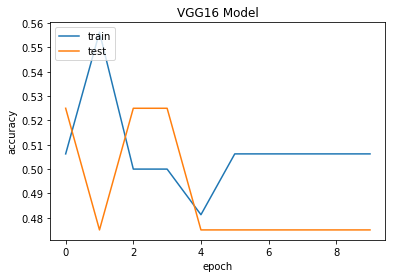

In [27]:
import pickle

with open('VGG16_based_history.history', 'rb') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('VGG16 Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Section 5 - Evaluation

1.We first loaded 200 images of cats and dogs and after that we realized that the images are of different size and that is why we applied the code to resize them and changed the image's width and height.

2.Then we used formula:"(n,w*l*d)" in order to run different models of svms and neural networks on the dataset.

3.Now we are exploring various kernels of svm's and then figuring out the best parameters for the model, in this case we are trying to understand the best value for "c", where a lower value depicts more flexibility to the model and higher c value depicts higher constraints on the model.


| Model | Train Accuracy | Test Accuracy|
| ------ | ------ | ------ |
| SVM Linear kernel c=0.000750 | 100% | 72.5% |
| SVM gaussian kernel c=5 | 97% | 67.5% |
| SVM Sigmoid Kernel c=0.5 | 43%  |65.0% |
| SVM ploynomial Kernel c=0.05 | 100%  | 80.0% |

4. Now we are moving on to neural networks with the intention of increasing the accuracy, therefore we are trying two modes of neural networks first one is simple nueral networks and the other one is convolutional nueral networks 

5. In the simple neural networks we have used 4 layers and in convolutional nueral networks we have used 4 layers(without dropout mechanism)

| Model | Train Accuracy | Test Accuracy|
| ------ | ------ | ------ |
| Simple Neural network phase1 | 55.63% | 67.50% |
| Simple Neural network phase2 | 61.88% | 67.50% |
| Simple Neural network phase3 | 60.63%  |60.00% |
| Convolutional Neural network phase1 | 52.50% | 65.00% |
| Convolutional Neural network phase2 | 75.00% | 62.50% |
| Convolutional Neural network phase3 | 56.87% | 60.00% |
| Convolutional Neural network phase4 | 59.38% | 62.50%|
| Pre-trained Neural network | 50.00% | 52.50%|

A neural network doesnt act simply as a classification but it adds another layer that learns the attributes that in turn learn the final classification.In simple terms it breaks down a complex problems in some less complex problems.

From this machine learning assignment we got to learn the basics of SVM(s) and Neural networks(simple as well as convolutional)